<a href="https://colab.research.google.com/github/betofroesjr/analiseAcidentes2019/blob/master/analiseAcidentes2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

from google.colab import files
data_to_load = files.upload()

Saving datatran2019.csv to datatran2019 (1).csv


In [2]:
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['datatran2019.csv']), sep=';', encoding='iso-8859-1')

In [32]:
df.head(5)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,182210.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,11,4,4,2,0,1,1,0,Sim,4,0,4,0,0,0,4,1,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
1,182211.0,2019-01-01,terça-feira,01:30:00,PR,373.0,"177,3",PONTA GROSSA,11,8,8,2,0,7,0,5,Sim,1,0,1,0,0,0,1,1,"-25,05533957","-50,22776753",SR-PR,DEL7/3,UOP01/PR
2,182212.0,2019-01-01,terça-feira,00:45:00,SC,101.0,16,GARUVA,1,4,4,2,1,1,0,5,Sim,1,0,1,0,0,0,1,1,"-26,1216","-48,8826",SR-SC,DEL8/3,UOP01/SC
3,182214.0,2019-01-01,terça-feira,00:00:00,CE,20.0,"429,5",FORTALEZA,13,4,4,2,1,7,0,9,Sim,1,0,0,1,0,0,1,1,"-3,76999","-38,670063",SR-CE,DEL16/1,UOP02/CE
4,182215.0,2019-01-01,terça-feira,01:00:00,MG,381.0,327,NOVA ERA,11,7,7,2,1,7,2,2,Não,2,0,0,1,1,0,1,2,"-19,7609","-43,0306",SR-MG,DEL4/3,UOP01/MG


In [13]:
print(df.shape)

(67446, 30)


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67446 entries, 0 to 67445
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      67446 non-null  float64
 1   data_inversa            67446 non-null  object 
 2   dia_semana              67446 non-null  object 
 3   horario                 67446 non-null  object 
 4   uf                      67446 non-null  object 
 5   br                      67351 non-null  float64
 6   km                      67351 non-null  object 
 7   municipio               67446 non-null  object 
 8   causa_acidente          67446 non-null  int8   
 9   tipo_acidente           67446 non-null  int8   
 10  classificacao_acidente  67446 non-null  int8   
 11  fase_dia                67446 non-null  int8   
 12  sentido_via             67446 non-null  int8   
 13  condicao_metereologica  67446 non-null  int8   
 14  tipo_pista              67446 non-null

In [0]:
df['causa_acidente'] = df.causa_acidente.astype('category')
df['causa_acidente'].cat.categories
df['causa_acidente'] = df['causa_acidente'].cat.codes

In [0]:
df['tipo_acidente'] = df.tipo_acidente.astype('category')
df['tipo_acidente'].cat.categories
df['tipo_acidente'] = df['tipo_acidente'].cat.codes

In [0]:
df['classificacao_acidente'] = df.classificacao_acidente.astype('category')
df['classificacao_acidente'].cat.categories
df['classificacao_acidente'] = df['classificacao_acidente'].cat.codes

In [0]:
df['fase_dia'] = df.fase_dia.astype('category')
df['fase_dia'].cat.categories
df['fase_dia'] = df['fase_dia'].cat.codes

In [0]:
df['sentido_via'] = df.sentido_via.astype('category')
df['sentido_via'].cat.categories
df['sentido_via'] = df['sentido_via'].cat.codes

In [0]:
df['condicao_metereologica'] = df.condicao_metereologica.astype('category')
df['condicao_metereologica'].cat.categories
df['condicao_metereologica'] = df['condicao_metereologica'].cat.codes

In [0]:
df['tipo_pista'] = df.tipo_pista.astype('category')
df['tipo_pista'].cat.categories
df['tipo_pista'] = df['tipo_pista'].cat.codes

In [0]:
df['tracado_via'] = df.tracado_via.astype('category')
df['tracado_via'].cat.categories
df['tracado_via'] = df['tracado_via'].cat.codes

In [0]:
df['tracado_via'] = df.tracado_via.astype('category')
df['tracado_via'].cat.categories
df['tracado_via'] = df['tracado_via'].cat.codes

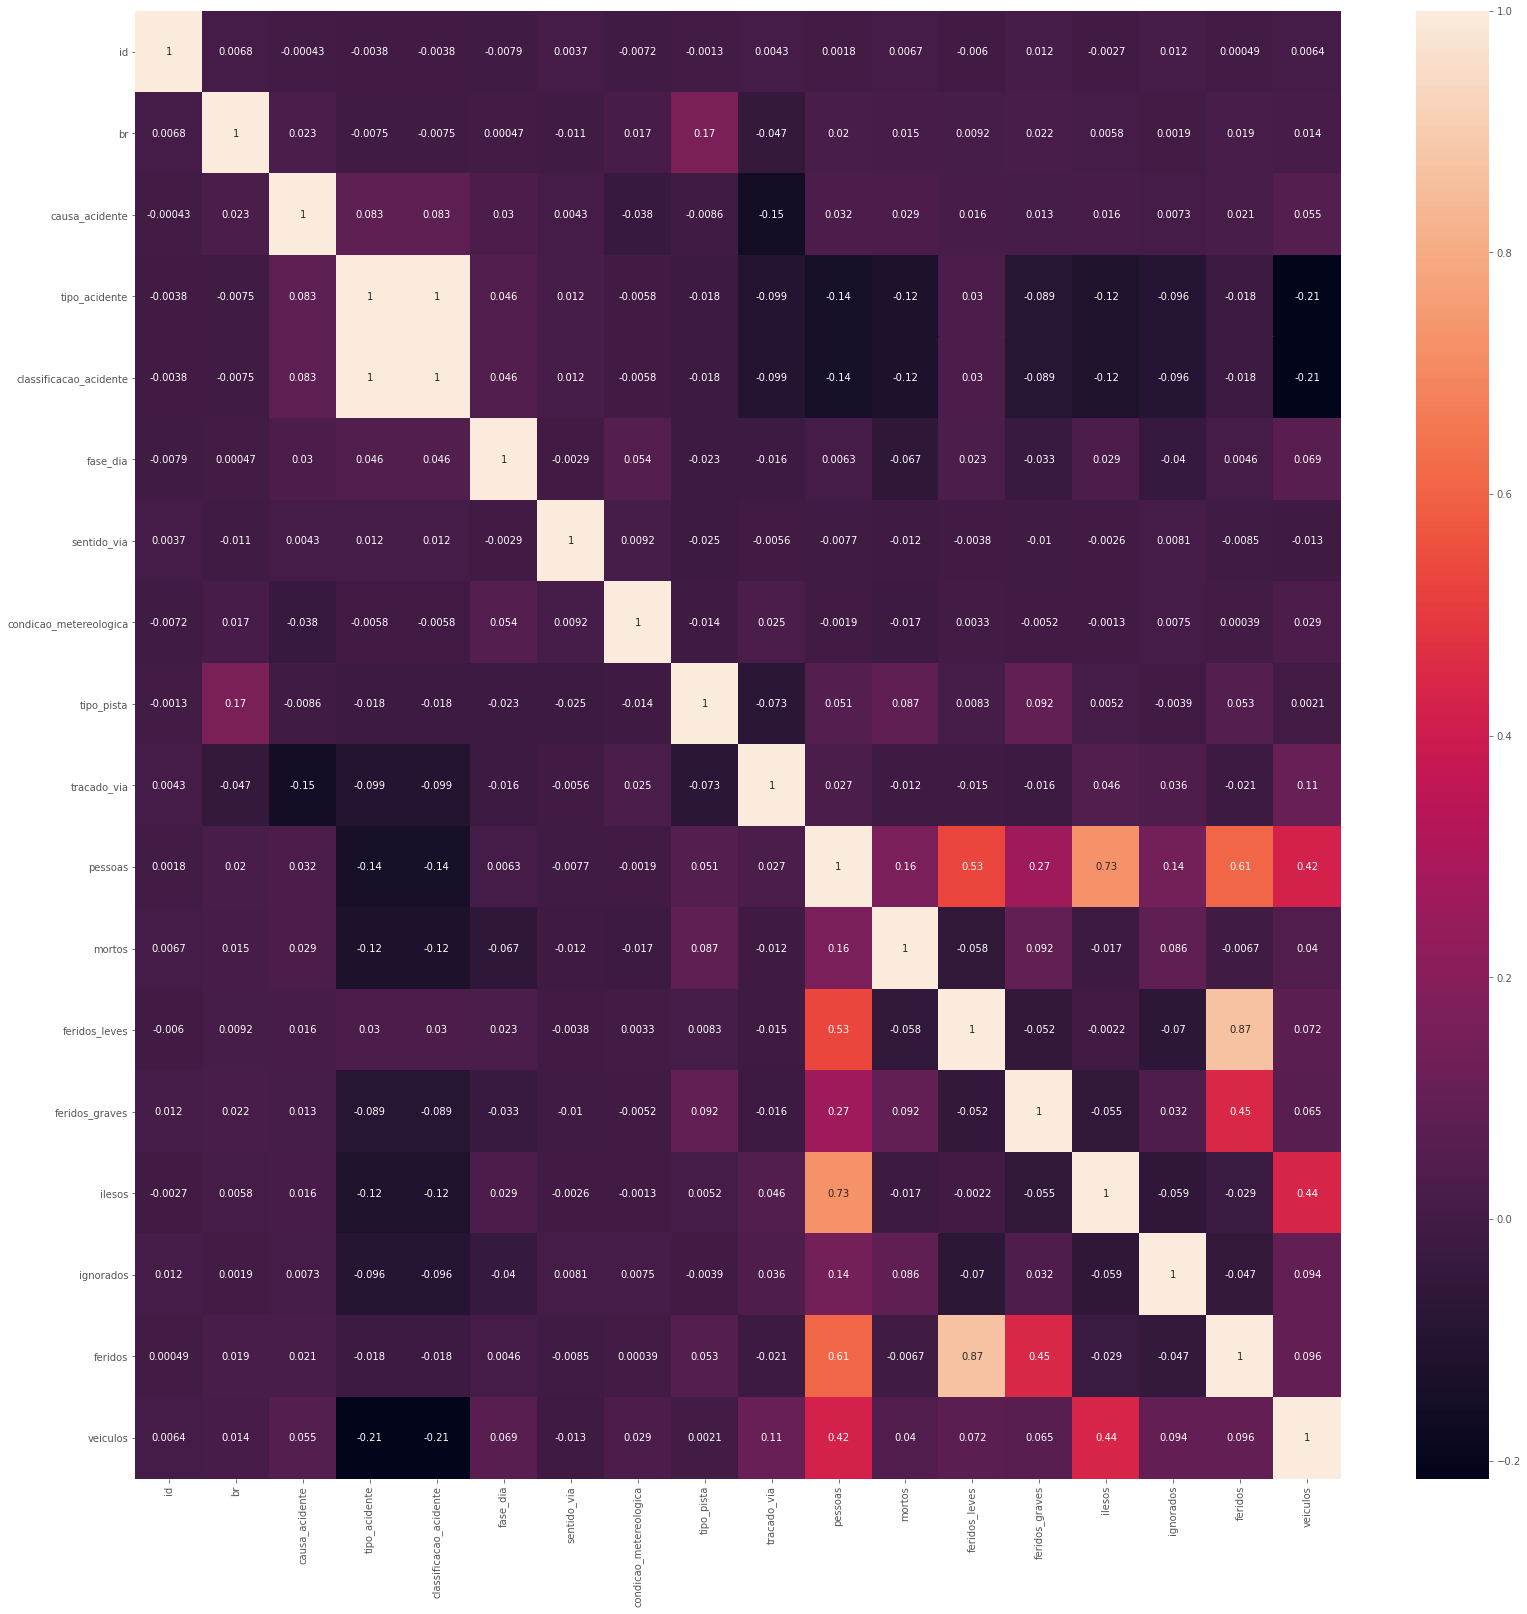

In [34]:
plt.figure(figsize=(27,27))
sns.heatmap(df.corr(), annot=True)

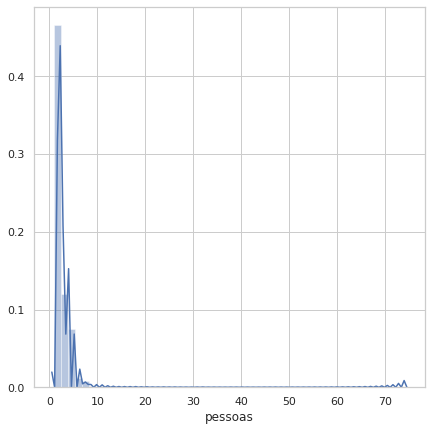

In [35]:
plt.figure(figsize = (7,7))
sns.set(style = "whitegrid")
f = sns.distplot(df["pessoas"])

In [37]:
q1 = df["pessoas"].quantile(0.25)
q3 = df["pessoas"].quantile(0.75)
IQR = q3 - q1
IF = q1 - (1.5 * IQR)
OF = q3 + (1.5 * IQR)

ds = df[~((df["pessoas"] < IF) | (df["pessoas"] > OF))]
ds.shape

(66157, 30)

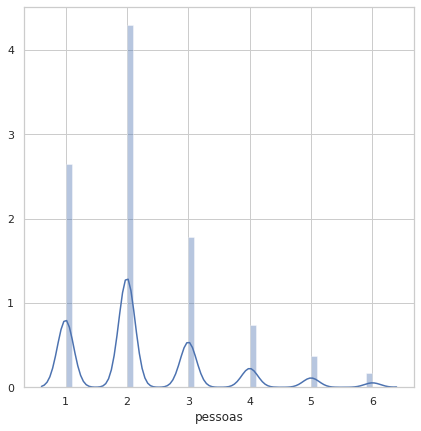

In [38]:
plt.figure(figsize = (7,7))
sns.set(style = "whitegrid")
f = sns.distplot(ds["pessoas"])

In [0]:
x = ds[['mortos', 'feridos','ilesos']]
y = ds["pessoas"]

In [0]:
x = x.fillna(method='ffill')
y = y.fillna(method='ffill')

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [42]:
modelo_regressaoLog = LogisticRegression(C = 0.7, random_state = 42)
modelo_regressaoLog.fit(x_train, y_train.ravel())

regressao_log_predict_test = modelo_regressaoLog.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [43]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_test, regressao_log_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(y_test, regressao_log_predict_test, labels = [1, 0]))

Exatidão (Accuracy): 0.8946

Classification Report
              precision    recall  f1-score   support

           1       0.84      1.00      0.91      5295
           0       0.00      0.00      0.00         0

   micro avg       0.84      1.00      0.91      5295
   macro avg       0.42      0.50      0.46      5295
weighted avg       0.84      1.00      0.91      5295



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
df.isnull().values.any()

True

In [45]:
df.tail(5)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
67441,266255.0,2019-10-07,segunda-feira,09:10:00,ES,101.0,"270,5",SERRA,11,15,15,3,0,1,0,5,Sim,2,0,0,1,1,0,1,2,"-20,23107","-40,27387",SR-ES,DEL12/2,UOP01/ES
67442,266406.0,2019-11-25,segunda-feira,07:20:00,PR,116.0,125,FAZENDA RIO GRANDE,11,6,6,3,1,1,0,5,Sim,3,0,1,0,1,1,1,2,"-25,59505","-49,31631",SR-PR,DEL7/1,UOP03/PR
67443,266434.0,2019-06-03,segunda-feira,19:00:00,CE,222.0,"1,4",CAUCAIA,17,8,8,2,0,1,0,5,Sim,2,0,0,1,1,0,1,2,"-3,736507","-38,65337",SR-CE,DEL16/1,UOP01/CE
67444,266573.0,2019-07-13,sábado,19:35:00,PR,373.0,425,CANDOI,5,14,14,2,1,4,2,5,Não,1,0,0,1,0,0,1,1,"-25,7118","-52,18374",SR-PR,DEL7/3,UOP02/PR
67445,266627.0,2019-10-22,terça-feira,20:20:00,BA,324.0,608,SIMOES FILHO,6,13,13,2,0,1,2,5,Não,1,0,1,0,0,0,1,1,"-12,78156","-38,41656",SR-BA,DEL10/1,UOP01/BA


In [47]:
def plot_corr(df, size=10):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)

df.corr()

,id,br,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
id,1.000000,0.006823,-0.000434,-0.003771,-0.003771,-0.007903,0.003716,-0.007163,-0.001279,0.004342,0.001768,0.006651,-0.005995,0.011893,-0.002728,0.011914,0.000494,0.006417
br,0.006823,1.000000,0.022503,-0.007523,-0.007523,0.000468,-0.010796,0.016513,0.165533,-0.047485,0.019569,0.014741,0.009176,0.022328,0.005839,0.001937,0.019230,0.014212
causa_acidente,-0.000434,0.022503,1.000000,0.082946,0.082946,0.030358,0.004266,-0.037795,-0.008608,-0.154936,0.031764,0.028908,0.016315,0.012725,0.015987,0.007287,0.020889,0.055368
tipo_acidente,-0.003771,-0.007523,0.082946,1.000000,1.000000,0.045851,0.011603,-0.005839,-0.017893,-0.099236,-0.138537,-0.122019,0.029592,-0.089361,-0.115275,-0.095893,-0.017550,-0.214896
classificacao_acidente,-0.003771,-0.007523,0.082946,1.000000,1.000000,0.045851,0.011603,-0.005839,-0.017893,-0.099236,-0.138537,-0.122019,0.029592,-0.089361,-0.115275,-0.095893,-0.017550,-0.214896
fase_dia,-0.007903,0.000468,0.030358,0.045851,0.045851,1.000000,-0.002917,0.054221,-0.023071,-0.015847,0.006269,-0.066656,0.023339,-0.033164,0.029353,-0.039626,0.004557,0.068546
sentido_via,0.003716,-0.010796,0.004266,0.011603,0.011603,-0.002917,1.000000,0.009210,-0.024741,-0.005573,-0.007673,-0.011683,-0.003777,-0.010425,-0.002592,0.008128,-0.008524,-0.013032
condicao_metereologica,-0.007163,0.016513,-0.037795,-0.005839,-0.005839,0.054221,0.009210,1.000000,-0.013728,0.024643,-0.001926,-0.016512,0.003294,-0.005185,-0.001342,0.007483,0.000394,0.028511
tipo_pista,-0.001279,0.165533,-0.008608,-0.017893,-0.017893,-0.023071,-0.024741,-0.013728,1.000000,-0.073420,0.051306,0.086962,0.008322,0.092439,0.005178,-0.003912,0.053032,0.002078
tracado_via,0.004342,-0.047485,-0.154936,-0.099236,-0.099236,-0.015847,-0.005573,0.024643,-0.073420,1.000000,0.026806,-0.011586,-0.015272,-0.015716,0.046109,0.035781,-0.021429,0.111783
